In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
df = pd.read_csv("/Users/kaustubhshinde/Downloads/uber.csv")

In [4]:
df

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [5]:
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [6]:
df.dtypes

Unnamed: 0             int64
key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [8]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [9]:
df["dropoff_longitude"] = df["dropoff_longitude"].ffill()

In [10]:
df["dropoff_latitude"] = df["dropoff_latitude"].ffill()

In [11]:
df = df.drop(columns = ["key", "Unnamed: 0"])

In [12]:
df["pickup_datetime"] = pd.to_datetime(df["pickup_datetime"])

In [15]:
df.dtypes

fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

In [16]:
from haversine import haversine, Unit

In [17]:
 #haversine is used to calculate the shortest distance betweeen two longitude and latitude 

df = df[(df['pickup_longitude'].between(-180, 180)) &          #removing out of range values
        (df['pickup_latitude'].between(-90, 90)) &
        (df['dropoff_longitude'].between(-180, 180)) & 
        (df['dropoff_latitude'].between(-90, 90))]

df["distance"] = df.apply(lambda row: haversine(               #using hoversine to calculate distances
    (row["pickup_latitude"],row["pickup_longitude"]),
    (row["dropoff_latitude"], row["dropoff_longitude"])
     ,unit=Unit.KILOMETERS), axis=1)

df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,1.683325
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2.457593
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,5.036384
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,1.661686
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,4.475456
...,...,...,...,...,...,...,...,...
199995,3.0,2012-10-28 10:49:00+00:00,-73.987042,40.739367,-73.986525,40.740297,1,0.112210
199996,7.5,2014-03-14 01:09:00+00:00,-73.984722,40.736837,-74.006672,40.739620,1,1.875053
199997,30.9,2009-06-29 00:42:00+00:00,-73.986017,40.756487,-73.858957,40.692588,2,12.850337
199998,14.5,2015-05-20 14:56:25+00:00,-73.997124,40.725452,-73.983215,40.695415,1,3.539720


In [18]:
import seaborn as sns

<Axes: xlabel='fare_amount', ylabel='distance'>

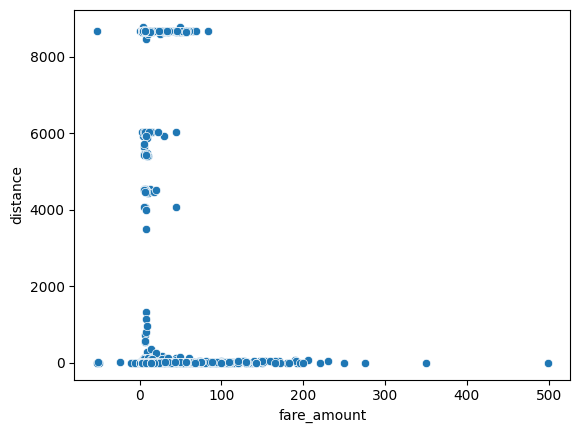

In [19]:
sns.scatterplot(data = df, x = df["fare_amount"], y = df["distance"])

In [20]:
df = df[(df["distance"].between(0, 50))&
        (df["fare_amount"].between(0, 200))]

<Axes: xlabel='fare_amount', ylabel='distance'>

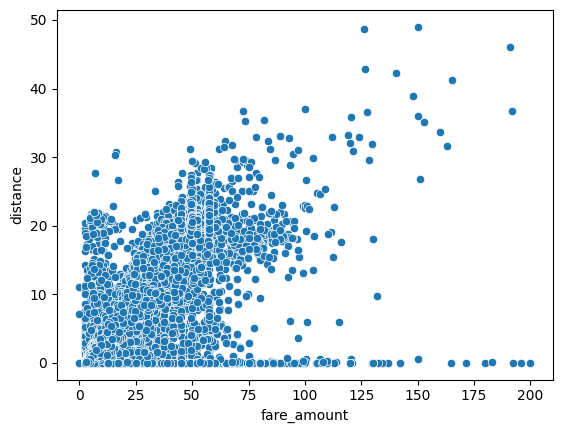

In [21]:
sns.scatterplot(data = df, x = df["fare_amount"], y = df["distance"])

In [22]:
df1 = df.drop(columns = ['pickup_datetime', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count'])

In [23]:
df1.corr()

,fare_amount,distance
fare_amount,1.000000,0.844795
distance,0.844795,1.000000


In [24]:
x=df["distance"] 
y=df["fare_amount"]
x = x.values.reshape(-1, 1)
y = y.values.reshape(-1, 1) # ye basically 2d array bana raha hai

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state= 42)

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
lr = LinearRegression()

In [29]:
lr.fit(x_train, y_train)


LinearRegression()

In [30]:
y_pred = lr.predict(x_test)

In [31]:
y_pred

array([[ 5.61459049],
       [13.17204773],
       [ 5.31105099],
       ...,
       [ 9.69551941],
       [ 5.65715907],
       [ 7.17200199]])

In [32]:
from sklearn.ensemble import RandomForestRegressor

In [33]:
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)

In [34]:
rf.fit(x_train, y_train.ravel())  # using ravel we are making it 1d array because generally the y_train attribute of rf needs one d array as input


RandomForestRegressor(random_state=42)

In [35]:
y_pred = rf.predict(x_test)

In [36]:
from sklearn.metrics import mean_squared_error

In [37]:
mac = mean_squared_error(y_pred, y_test)

In [38]:
print(mac)

34.026791189113474


In [39]:
rac = np.sqrt(mean_squared_error(y_pred, y_test))

In [40]:
print (rac)

5.83324876797771
